## Logistic Regression

In [20]:
# Importing required libraries
# (not allowed: scikit-learn or any other libraries with inbuilt functions that help to implement ML methods).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Read the dataset using read_csv
df = pd.read_csv('penguins.csv')
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
# Removing rows with NA values
df = df.dropna()

In [4]:
# Converting features with string data type to categorical
df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
df['island'].replace(['Torgersen', 'Biscoe', 'Dream'],[0, 1, 2], inplace=True)
df['sex'].replace(['MALE', 'FEMALE', '.'],[0, 1, -1], inplace=True)
df = df[df['sex'] != -1]

# Normalize non-categorical features
non_categorical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in non_categorical_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col] = (df[col] - col_min) / (col_max - col_min)

# Checking the converted datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


In [5]:
# Choosing column sex as Y target variable
X = df.drop(['sex'], axis=1)
y = df['sex']

In [6]:
# Dividing the dataset into 80% training and 20% testing.
combined_data_array = np.column_stack((X, y))
cal_idx = int(0.8 * len(combined_data_array))
training_data = combined_data_array[:cal_idx]
testing_data = combined_data_array[cal_idx:]

X_train, y_train = training_data[:, :-1], training_data[:, -1]
X_test, y_test = testing_data[:, :-1], testing_data[:, -1]

# Printing the shape
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (266, 6)
y_train: (266,)
X_test: (67, 6)
y_test: (67,)


In [7]:
# Defining Logistic Regression
class LogitRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y, wt):
        z = np.dot(X, wt)
        h = self.sigmoid(z)
        loss = np.mean(-y * np.log(h) - (1- y) * np.log(1-h))
#         print(f"Loss after iteration - {loss}")
        return loss
    
    def gradient_descent(self, X, y, wt):
        z = np.dot(X, wt)
        pred = self.sigmoid(z)
        delta = pred - y
        dW = (np.dot(X.T, delta)) / y.size
        return dW
        
    def fit(self, X, y):
        self.loss = []
        self.best_wt = None
        self.low_loss = float('inf')
        self.wt = np.random.uniform(0, 1, X.shape[1])
        for i in range(self.iterations):
            self.wt -= self.learning_rate * self.gradient_descent(X, y, self.wt)
            loss = self.cost(X, y, self.wt)
            self.loss.append(loss)
            if loss < self.low_loss:
                self.best_wt = np.copy(self.wt)
                self.low_loss = loss
            
    def predict(self, X):
        z = np.dot(X, self.wt)
        y_hat = np.where(self.sigmoid(z) >= 0.5, 1, 0)
        return y_hat

In [49]:
# Training the model
model = LogitRegression(learning_rate=1e-3, iterations=1000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8507462686567164


In [50]:
# Calculate the correct and incorrect number of predictions made
cor_pred = np.sum(y_pred == y_test)
inc_pred = np.sum(y_pred != y_test)

# Calculate the accuracy
accuracy = cor_pred / len(y_test)

print("Correct predictions made:", cor_pred)
print("Incorrect predictions made:", inc_pred)
print("Accuracy:", accuracy)

Correct predictions made: 57
Incorrect predictions made: 10
Accuracy: 0.8507462686567164


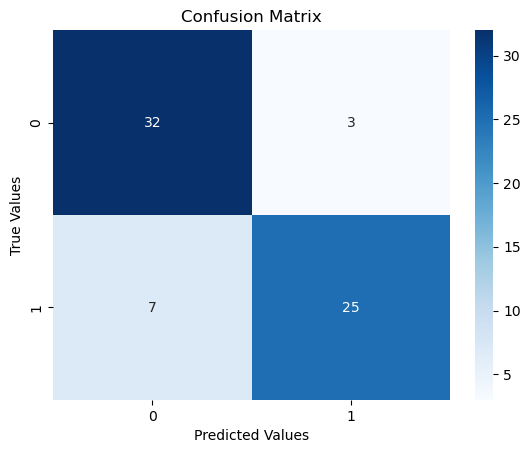

In [51]:
# Plotting confusion matrix for insight only
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

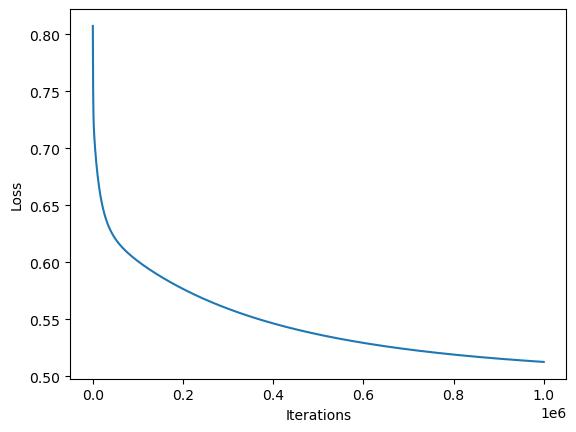

In [18]:
plt.plot(model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()